In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score


In [2]:
insur = pd.read_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Insurance_Premiums\insurance.csv")

In [3]:
insur.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insur.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
insur.duplicated().sum()

1

In [9]:
insur.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [11]:
insur.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
insur.drop_duplicates(inplace = True)

In [14]:
insur

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [6]:
for col_name in insur.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = insur[col_name].quantile(0.25)
    q3 = insur[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",insur.loc[(insur[col_name] < low) | (insur[col_name] > high), col_name])

age
Outliers =  Series([], Name: age, dtype: int64)
bmi
Outliers =  116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64
children
Outliers =  Series([], Name: children, dtype: int64)


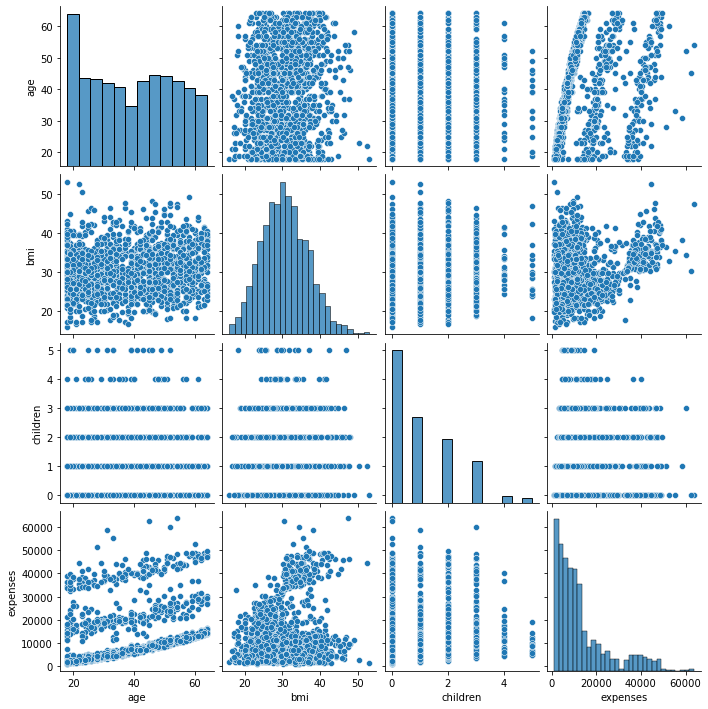

In [7]:
sns.pairplot(insur)

In [8]:
insur.value_counts()

age  sex     bmi   children  smoker  region     expenses
19   male    30.6  0         no      northwest  1639.56     2
30   male    37.4  3         no      northeast  5428.73     1
             38.8  1         no      southeast  18963.17    1
             44.2  2         no      southeast  4266.17     1
31   female  21.8  0         no      northwest  4134.08     1
                                                           ..
47   male    36.2  0         yes     southeast  41676.08    1
                   1         no      southwest  8068.19     1
             38.9  2         yes     southeast  44202.65    1
             47.5  1         no      southeast  8083.92     1
18   female  20.8  0         no      southeast  1607.51     1
Length: 1337, dtype: int64

In [9]:
insur.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [10]:
insur['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [11]:
insur["region"].replace({
    'southeast': 3,
    'southwest': 4,
    'northeast': 1,
    'northwest': 0
}, inplace=True)

In [12]:
insur['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
insur["sex"].replace({
    'male': 1,
    'female': 0
}, inplace=True)

In [14]:
insur

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,4,16884.92
1,18,1,33.8,1,no,3,1725.55
2,28,1,33.0,3,no,3,4449.46
3,33,1,22.7,0,no,0,21984.47
4,32,1,28.9,0,no,0,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,0,10600.55
1334,18,0,31.9,0,no,1,2205.98
1335,18,0,36.9,0,no,3,1629.83
1336,21,0,25.8,0,no,4,2007.95


In [15]:
insur['smoker'].value_counts()
insur["smoker"].replace({
    'no': 1,
    'yes': 0
}, inplace=True)

In [16]:
#we are removing job column because we have done label encoding before
numerical_data = insur.select_dtypes(include=np.number)

In [17]:
numerical_data

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,4,16884.92
1,18,1,33.8,1,1,3,1725.55
2,28,1,33.0,3,1,3,4449.46
3,33,1,22.7,0,1,0,21984.47
4,32,1,28.9,0,1,0,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,1,0,10600.55
1334,18,0,31.9,0,1,1,2205.98
1335,18,0,36.9,0,1,3,1629.83
1336,21,0,25.8,0,1,4,2007.95


In [18]:
categorical_data = insur.select_dtypes(exclude=np.number)

In [19]:
categorical_data

""
0
1
2
3
4
...
1333
1334
1335
1336


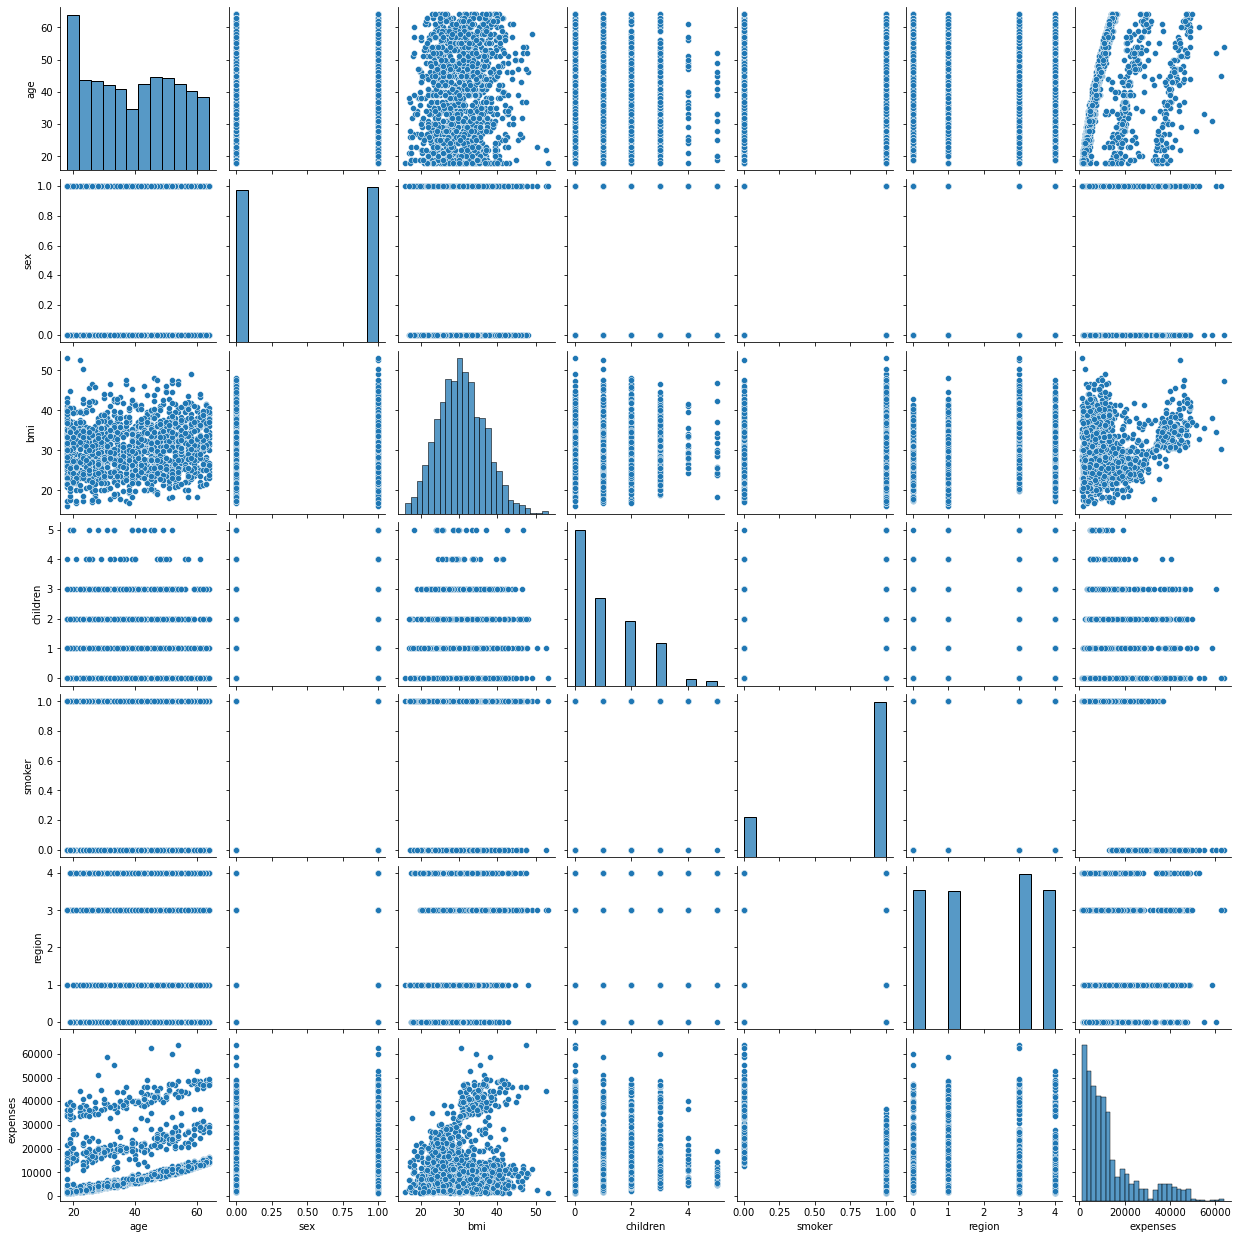

In [20]:
sns.pairplot(insur)

In [21]:
insur.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,0.025019,0.001722,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,-0.076185,0.009338,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,-0.003968,0.185363,0.198576
children,0.042469,0.017163,0.012645,1.000000,-0.007673,-0.001898,0.067998
smoker,0.025019,-0.076185,-0.003968,-0.007673,1.000000,-0.018681,-0.787251
region,0.001722,0.009338,0.185363,-0.001898,-0.018681,1.000000,0.017462
expenses,0.299008,0.057292,0.198576,0.067998,-0.787251,0.017462,1.000000


<AxesSubplot:>

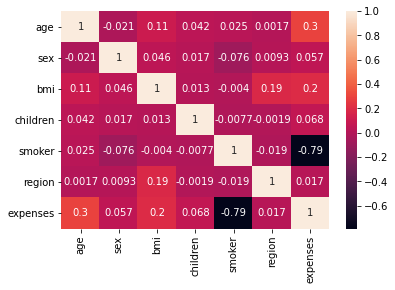

In [22]:
sns.heatmap(insur.corr(), annot=True)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
X = insur.drop(columns="expenses")

In [25]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature        VIF
0       age   7.754361
1       sex   1.986692
2       bmi  12.179990
3  children   1.801462
4    smoker   4.374604
5    region   2.759299


In [26]:
y = insur["expenses"]

In [27]:
model = LinearRegression()

In [28]:
model.fit(X,y)

LinearRegression()

In [29]:
model.coef_

array([   257.26663066,   -129.38682169,    333.18948744,    473.55476463,
       -23837.53739421,   -222.89510633])

In [30]:
model.intercept_

11921.679913589378

In [31]:
y_pred = model.predict(X)

In [32]:
y_pred

array([25214.15217037,  3652.22917067,  6905.45341653, ...,
        4340.94863881,  1191.45011384, 37310.75846819])

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
print("MSE : ",mean_squared_error(y,y_pred))
print("MAE : ",mean_absolute_error(y,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

MSE :  36556338.92660585
MAE :  4180.096691568554
RMSE :  6046.183831691346
MAPE :  42.36199992341252


In [35]:
def linear_best_fit(X,y):
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    print("MSE : ",mean_squared_error(y,y_pred))
    print("MAE : ",mean_absolute_error(y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
    print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

def mean_absolute_percentage_error(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

In [36]:
linear_best_fit(X,y)

MSE :  36556338.92660585
MAE :  4180.096691568554
RMSE :  6046.183831691346
MAPE :  42.36199992341252


In [37]:
X = insur.drop(columns=["bmi","expenses"])

In [38]:
linear_best_fit(X,y)

MSE :  40481826.86844529
MAE :  4080.318693061362
RMSE :  6362.5330544088565
MAPE :  32.103608782720606


In [39]:
# its not reducing the error if in case we remove more columns. So removing bmi makes sense.
# smoker correlation is very less with expenses, but seems to increase the error if not included.
X = insur.drop(columns=["bmi","region","sex","expenses"])

In [40]:
linear_best_fit(X,y)

MSE :  40483432.52396304
MAE :  4080.242519542295
RMSE :  6362.659233682332
MAPE :  31.99322745977531


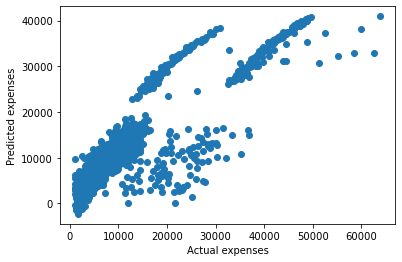

In [41]:
plt.xlabel("Actual expenses")
plt.ylabel("Predicted expenses")

plt.scatter(y, y_pred)

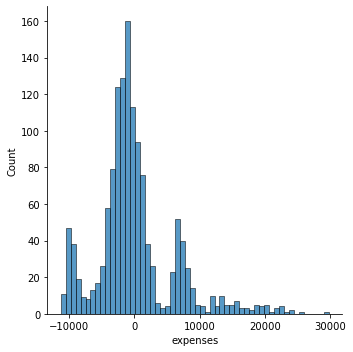

In [42]:
error = y-y_pred
sns.displot(error)

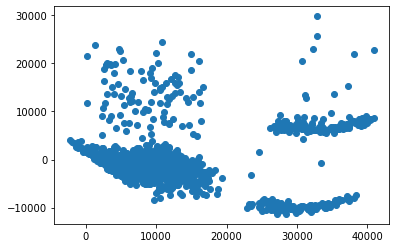

In [43]:
error = y-y_pred
plt.scatter( y_pred, error)

(array([ 80., 291., 331., 288.,  73.,   6.,  51.,  93.,  77.,  48.]),
 array([-2306.30825776,  2018.1800035 ,  6342.66826475, 10667.15652601,
        14991.64478726, 19316.13304852, 23640.62130977, 27965.10957103,
        32289.59783228, 36614.08609354, 40938.57435479]),
 <BarContainer object of 10 artists>)

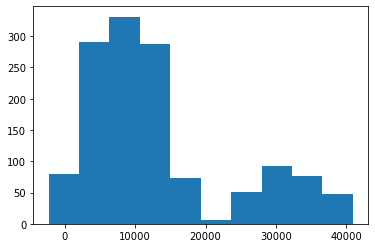

In [44]:
plt.hist(y_pred)

In [45]:
# it doesnt satisfy 3-4 assumptions of linear regression. Not sure whether this dataset can use linear regression model. I will for now
# do the test and train for this data_set

In [46]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [47]:
X_train.head()

,age,children,smoker
588,61,0,1
261,20,1,0
743,31,0,1
1293,46,3,1
1294,58,0,1


In [48]:
X_test.head()

,age,children,smoker
1247,33,4,1
809,25,1,1
164,37,0,1
405,52,2,1
637,35,2,1


In [49]:
y_train

588     13635.64
261     17085.27
743      3757.84
1293     9301.89
1294    11931.13
          ...   
570      3761.29
452      1969.61
679     10156.78
671      3943.60
669      6500.24
Name: expenses, Length: 936, dtype: float64

In [50]:
y_test

1247     6059.17
809      3309.79
164      5028.15
405     11396.90
637     24915.05
          ...   
154      7077.19
1228    10594.23
1135    11085.59
518      5240.77
318      7421.19
Name: expenses, Length: 402, dtype: float64

In [51]:
kf = KFold(n_splits=10)

In [52]:
X.isnull().sum()

age         0
children    0
smoker      0
dtype: int64

In [53]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [54]:
insur

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,4,16884.92
1,18,1,33.8,1,1,3,1725.55
2,28,1,33.0,3,1,3,4449.46
3,33,1,22.7,0,1,0,21984.47
4,32,1,28.9,0,1,0,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,1,0,10600.55
1334,18,0,31.9,0,1,1,2205.98
1335,18,0,36.9,0,1,3,1629.83
1336,21,0,25.8,0,1,4,2007.95


In [55]:
i=1
test_result = []
for train_index, test_index in kf.split(X):
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(train_X, train_y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    train_mape = np.sqrt(mean_squared_error(train_y, train_pred))
    test_mape = np.sqrt(mean_squared_error(test_y, test_pred))
    print("Train MAPE = ",train_mape)
    print("Test MAPE = ",test_mape)
    
    test_result.append(test_mape)

Train MAPE =  6373.7758780942295
Test MAPE =  6266.562836649159
Train MAPE =  6350.052901175628
Test MAPE =  6481.500022998297
Train MAPE =  6378.562818413397
Test MAPE =  6225.111453920991
Train MAPE =  6346.895838092605
Test MAPE =  6529.059601509511
Train MAPE =  6319.751079692209
Test MAPE =  6754.199766998241
Train MAPE =  6458.958470092357
Test MAPE =  5434.660697562722
Train MAPE =  6413.887386006959
Test MAPE =  5886.046162866219
Train MAPE =  6252.880528648224
Test MAPE =  7285.970205540556
Train MAPE =  6399.421361289294
Test MAPE =  6039.748756804016
Train MAPE =  6317.42753864834
Test MAPE =  6772.992519131143


In [56]:
np.mean(test_result)

6367.585202398086

In [57]:
np.std(test_result)

493.61082815325204

In [58]:
6370.401564590836 - 498.908639220349, 6370.401564590836 + 498.908639220349

(5871.492925370487, 6869.310203811185)

In [76]:
model = LinearRegression()
np.mean(np.abs(cross_val_score(model, X, y, scoring = 'neg_root_mean_squared_error', cv = 10)))

6367.585202398086